# Singularity and Rank of Linear Transformations

Since matrices correspond to linear transformations, the concepts of **singular** and **non-singular** can be understood visually. The geometry of a transformation gives us a very intuitive way to identify its nature and even its **rank**.

The key is to look at the **image** of the transformation—the set of all possible output points after applying the transformation to every point in the original space.

---
## Case 1: Non-Singular Transformation

A **non-singular** transformation is one that maps a space onto another space of the **same dimension**. For example, it takes a 2D plane and maps it to the entire 2D plane. The grid might be stretched or sheared, but it still covers every point.

Let's analyze the transformation defined by this matrix:  

$ A = \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix} $  

To understand what this does to the entire plane, we only need to see where it sends our basis vectors, $\hat{i} = (1, 0)$ and $\hat{j} = (0, 1)$.

* **Transforming $\hat{i}$:** $ \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 3 \\ 1 \end{bmatrix} $  

* **Transforming $\hat{j}$:** $ \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \end{bmatrix} $

Because the two resulting vectors are not parallel, they form a new, valid basis that can span the entire 2D plane. Let's visualize this.

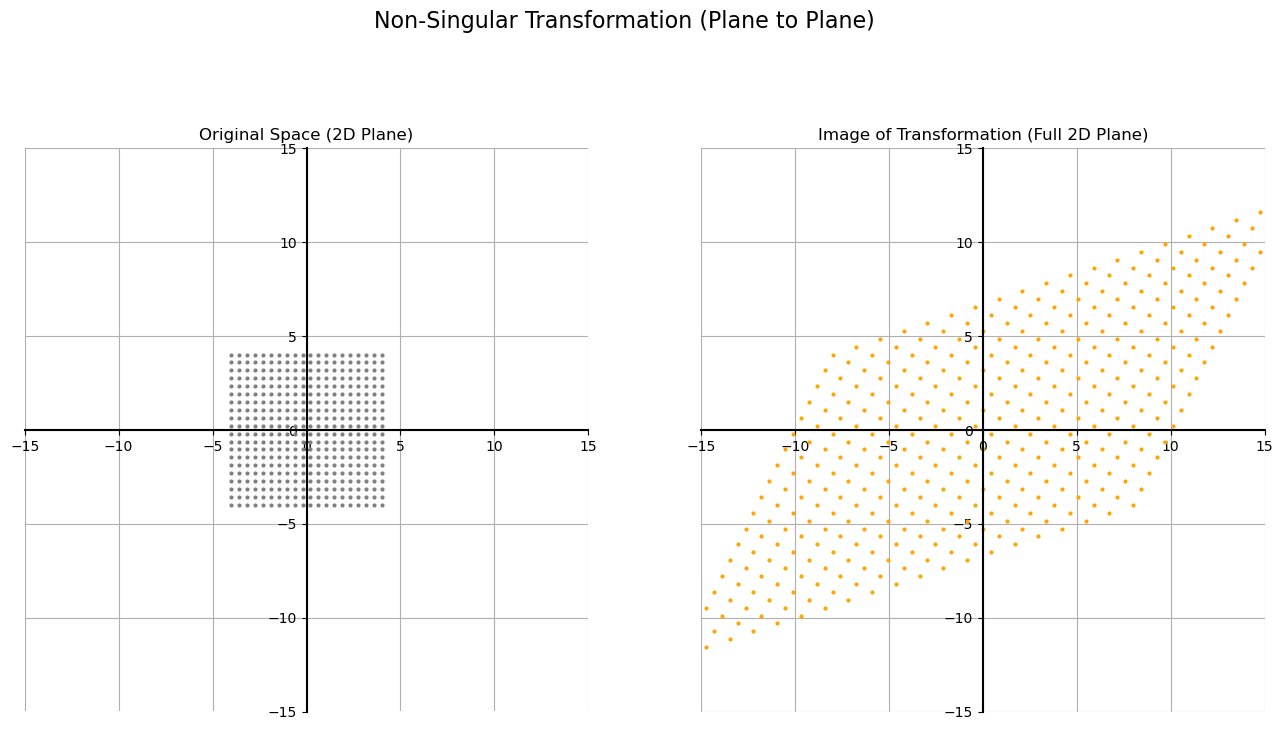

In [2]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt

# --- Define the non-singular transformation matrix ---
A_non_singular = np.array([[3, 1], [1, 2]])

# --- Create a grid of points in the original space ---
x = np.linspace(-4, 4, 20)
y = np.linspace(-4, 4, 20)
xx, yy = np.meshgrid(x, y)
original_points = np.vstack([xx.ravel(), yy.ravel()])

# --- Apply the transformation ---
transformed_points_A = A_non_singular @ original_points

# --- Create the plot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Non-Singular Transformation (Plane to Plane)', fontsize=16, y=1.02)

# --- Plot 1: Original Space ---
ax1.plot(original_points[0, :], original_points[1, :], 'o', color='gray', markersize=2)
ax1.set_title('Original Space (2D Plane)')

# --- Plot 2: Transformed Space ---
ax2.plot(transformed_points_A[0, :], transformed_points_A[1, :], 'o', color='orange', markersize=2)
ax2.set_title('Image of Transformation (Full 2D Plane)')

# --- Format both plots ---
for ax in [ax1, ax2]:
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

**Analysis:** The image of this transformation is the entire 2D plane. Since the dimension of the image (2) is the same as the dimension of the original space (2), the transformation is **non-singular**.

---

## Case 2: Singular Transformation

A **singular** transformation is one that squashes a space into a **lower dimension**. For example, it might take a 2D plane and collapse all the points onto a single line.

Let's analyze the transformation defined by this matrix:  

$ B = \begin{bmatrix} 1 & 1 \\ 2 & 2 \end{bmatrix} $  

Again, let's see where it sends our basis vectors:

* **Transforming $\hat{i}$:** $ \begin{bmatrix} 1 & 1 \\ 2 & 2 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \end{bmatrix} $  

* **Transforming $\hat{j}$:** $ \begin{bmatrix} 1 & 1 \\ 2 & 2 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \end{bmatrix} $

Both basis vectors land on the exact same output vector `(1, 2)`. This means the entire grid of the original plane gets collapsed onto the single line defined by this vector.

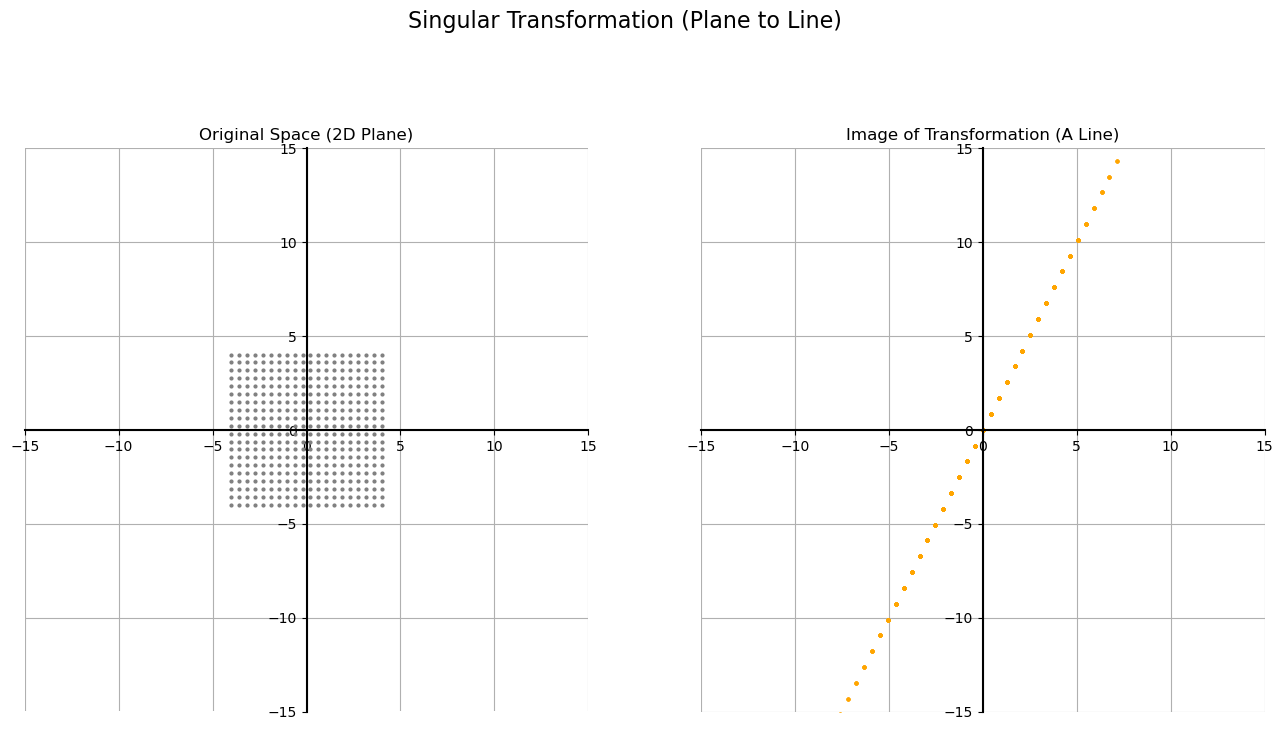

In [3]:
# --- Define the singular transformation matrix ---
B_singular = np.array([[1, 1], [2, 2]])

# --- Apply the transformation ---
transformed_points_B = B_singular @ original_points

# --- Create the plot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Singular Transformation (Plane to Line)', fontsize=16, y=1.02)

# --- Plot 1: Original Space ---
ax1.plot(original_points[0, :], original_points[1, :], 'o', color='gray', markersize=2)
ax1.set_title('Original Space (2D Plane)')

# --- Plot 2: Transformed Space ---
ax2.plot(transformed_points_B[0, :], transformed_points_B[1, :], 'o', color='orange', markersize=2)
ax2.set_title('Image of Transformation (A Line)')

# --- Format both plots ---
for ax in [ax1, ax2]:
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

**Analysis:** The image of this transformation is a line, which has a dimension of 1. Since the dimension of the image (1) is less than the dimension of the original space (2), the transformation is **singular**.

---
## The Geometric Definition of Rank

This visual understanding gives us our best definition of rank:

> **The rank of a matrix is the dimension of the image of its corresponding linear transformation.**

Let's summarize our findings:

| Matrix Type | Image of Transformation | Dimension of Image | Rank |
| :--- | :--- | :--- | :--- |
| **Non-Singular (A)**| The entire 2D plane | 2 | **2** |
| **Singular (B)** | A line | 1 | **1** |
| **Zero Matrix (C)** | A point (the origin) | 0 | **0** |

This shows that the rank directly measures how "squashed" or "collapsed" the output of a transformation is. A full-rank matrix preserves the original dimension, while a rank-deficient matrix reduces it.